In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load training data
train = pd.read_csv("C:/Users/HP/Downloads/Gotem_Pumpkins.csv")
# Load test data
test = pd.read_csv("C:/Users/HP/Downloads/Freyja_Pumpkins.csv")

In [3]:
# Features and target
x_train = train.drop('Class', axis=1).values
y_train = train['Class'].values
x_test = test.drop('Class', axis=1).values
y_test = test['Class'].values

In [4]:
# Convert class labels to 0 and 1 for both training and testing data
y_train = np.where(y_train == 'Ürgüp Sivrisi', 1, 0)
y_test = np.where(y_test == 'Ürgüp Sivrisi', 1, 0)

In [5]:
# Convert feature data to float64 for calculations
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

In [6]:
# Z-score normalization
def standardize(x_train, x_test):
    mean = x_train.mean(axis=0)
    std = x_train.std(axis=0)
    x_train = (x_train - mean) / std
    x_test = (x_test - mean) / std
    return x_train, x_test

In [7]:
x_train, x_test = standardize(x_train, x_test)

In [14]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
# Compute cost function
def compcost(x, y, weights, bias):
    m = len(y)
    z = np.dot(x, weights) + bias
    y_pred = sigmoid(z)
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

In [9]:
# Compute log likelihood
def loglikelihood(x, y, weights, bias):
    z = np.dot(x, weights) + bias
    y_pred = sigmoid(z)
    log_likelihood = np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return log_likelihood

In [10]:
# Gradient Descent to update weights and bias
def gradient_descent(x, y, weights, bias, rate, num_iter):
    m = len(y)
    costs = []
    log_likelihoods = []
    
    for i in range(num_iter):
        # Forward propagation
        z = np.dot(x, weights) + bias
        y_pred = sigmoid(z)
        
        # Backward propagation
        dw = (1/m) * np.dot(x.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        # Update parameters
        weights = weights - rate * dw
        bias = bias - rate * db
        
        # Compute cost and log likelihood every 5th iteration
        if i % 5 == 0:
            cost = compcost(x, y, weights, bias)
            log_likelihood = loglikelihood(x, y, weights, bias)
            costs.append(cost)
            log_likelihoods.append(log_likelihood)
            
    return weights, bias, costs, log_likelihoods

In [11]:
# Initialize parameters
def initialize(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

In [12]:
n_features = x_train.shape[1]
weights, bias = initialize(n_features)

In [15]:
# Training the model
rate = 0.001 
num_iter = 5000 
weights, bias, costs, log_likelihoods = gradient_descent(x_train, y_train, weights, bias, rate, num_iter)

In [19]:
# Print average log likelihood for every 5th iteration
print(f"Average Log Likelihoods (every 5th iteration):")
for i in range(len(log_likelihoods)):
    print(f"Iteration {i * 5}: Log Likelihood = {log_likelihoods[i]}")

Average Log Likelihoods (every 5th iteration):
Iteration 0: Log Likelihood = -1384.931957778485
Iteration 5: Log Likelihood = -1378.1749860431923
Iteration 10: Log Likelihood = -1371.5088191640166
Iteration 15: Log Likelihood = -1364.9321862821143
Iteration 20: Log Likelihood = -1358.4438251515182
Iteration 25: Log Likelihood = -1352.0424826268386
Iteration 30: Log Likelihood = -1345.7269151225937
Iteration 35: Log Likelihood = -1339.49588904459
Iteration 40: Log Likelihood = -1333.3481811938302
Iteration 45: Log Likelihood = -1327.2825791434707
Iteration 50: Log Likelihood = -1321.297881589398
Iteration 55: Log Likelihood = -1315.3928986750266
Iteration 60: Log Likelihood = -1309.5664522909642
Iteration 65: Log Likelihood = -1303.81737635021
Iteration 70: Log Likelihood = -1298.144517039586
Iteration 75: Log Likelihood = -1292.546733048118
Iteration 80: Log Likelihood = -1287.0228957731033
Iteration 85: Log Likelihood = -1281.5718895046186
Iteration 90: Log Likelihood = -1276.19261158

In [20]:
# Making predictions
def predict(x, weights, bias):
    z = np.dot(x, weights) + bias
    y_pred = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_pred]

In [21]:
# Predict labels for training data (Gotem_Pumpkins.csv)
y_pred_train = predict(x_train, weights, bias)
# Predict labels for test data (Freyja_Pumpkins.csv)
y_pred_test = predict(x_test, weights, bias)

In [23]:
# Checking accuracy for both Gotem_Pumpkins and Freyja_Pumpkins
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
print(f'Accuracy on Gotem_Pumpkins.csv (Training Data): {accuracy_train * 100:.2f}%')
print(f'Accuracy on Freyja_Pumpkins.csv (Test Data): {accuracy_test * 100:.2f}%')

Accuracy on Gotem_Pumpkins.csv (Training Data): 86.70%
Accuracy on Freyja_Pumpkins.csv (Test Data): 87.20%


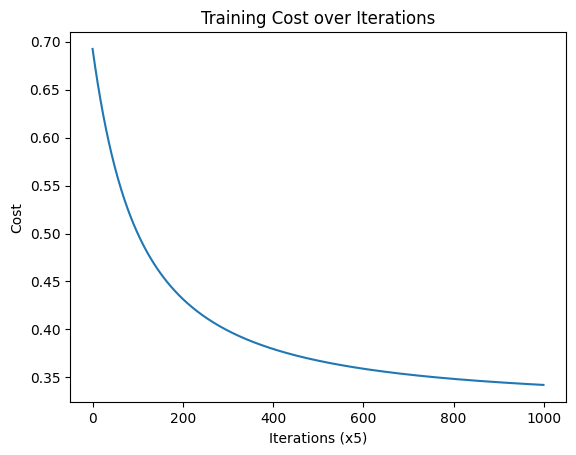

In [25]:
# Plot training cost over iterations
plt.plot(costs)
plt.xlabel('Iterations (x5)')
plt.ylabel('Cost')
plt.title('Training Cost over Iterations')
plt.show()

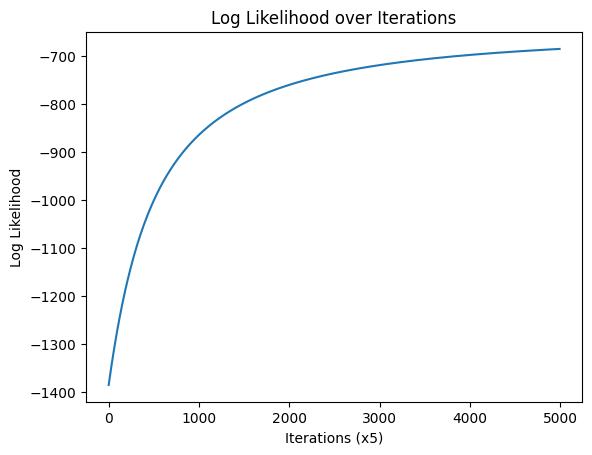

In [27]:
# Plot log likelihood over iterations
plt.plot([i * 5 for i in range(len(log_likelihoods))], log_likelihoods)
plt.xlabel('Iterations (x5)')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood over Iterations')
plt.show()